In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mline
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import numpy as np


ModuleNotFoundError: No module named 'matplotlib'

Get data about bitcoin values

In [2]:
btc = yf.Ticker("BTC-USD")

# Get historical data for Bitcoin
btc_data = btc.history(period="max")  # 'max' for all available data; you can also use '1d', '1mo', '1y', etc.

Check data crawled

In [3]:
btc_data.head

<bound method NDFrame.head of                                    Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2024-04-21 00:00:00+00:00  64992.816406  65723.242188  64277.722656   
2024-04-22 00:00:00+00:00  64935.632812  67233.960938  64548.179688   
2024-04-23 00:00:00+00:00  66839.890625  67199.242188  65864.867188   
2024-04-24 00:00:00+00:00  66408.718750  67075.367188  63589.871094   
2024-04-25 00:00:00+00:00  64275.988281  64674.156250  63752.257812   

                                  Close       

Extract dataset. Here i used value at column "Closed". The ideal was using values of 10 days before to predict the next day values

In [5]:

y = btc_data["Close"].to_numpy()
X = np.array([y[i-10:i] for i in range(10, len(y))])
y = y[10:]
print(X)

[[  457.33401489   424.44000244   394.79598999 ...   423.20498657
    411.57400513   404.42498779]
 [  424.44000244   394.79598999   408.9039917  ...   411.57400513
    404.42498779   399.51998901]
 [  394.79598999   408.9039917    398.8210144  ...   404.42498779
    399.51998901   377.18099976]
 ...
 [63821.47265625 65738.7265625  63426.2109375  ... 64994.44140625
  64926.64453125 66837.6796875 ]
 [65738.7265625  63426.2109375  63811.86328125 ... 64926.64453125
  66837.6796875  66407.2734375 ]
 [63426.2109375  63811.86328125 61276.69140625 ... 66837.6796875
  66407.2734375  64276.8984375 ]]


In [6]:
print(len(X))
print(len(y))

3499
3499


Split training and test data from the dataset in ratio 9:1 and then using a model to train these data.

In [8]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
# Create an ElasticNetCV model instance (cross-validated Elastic Net)
elastic_net_cv = ElasticNetCV(cv=5, random_state=0)
# model = LinearRegression().fit(X_train, y_train)

In [10]:
# Fit the model
elastic_net_cv.fit(X_train, y_train)


ElasticNetCV(cv=5, random_state=0)

In [11]:
# Predict on the test set
y_pred = elastic_net_cv.predict(X_test)
# y_pred = model.predict(X_test)

In [25]:
print(y_pred)

[27139.24170128 26852.49634165 26780.01359758 26875.48545567
 27100.78108811 27045.61599526 27285.88086494 26944.41588011
 26865.84608119 27045.08426602 26818.74389731 26812.38944623
 27105.52257244 26528.59954163 26442.41643884 26635.07016925
 26799.81309404 27743.9629246  27769.8658521  27689.46037483
 27319.90261975 26909.84239551 27127.85782772 27084.42082751
 27085.94708298 26087.40322427 26878.39418262 26518.16226416
 26463.61654972 26465.17660164 25992.26257636 25916.17053517
 25893.93404943 25893.72634216 25310.49533347 25465.14657766
 26107.07373896 26419.02544132 26348.57938176 26699.29305146
 27908.47010054 29514.45203036 29846.52785524 30448.45239241
 30522.8531726  30456.59166472 30285.76367131 30547.13252337
 30192.3213395  30335.37462174 30428.0339482  30526.06729527
 30576.35470259 30983.58090175 30823.82790674 30556.00340594
 30040.08138363 30218.20397962 30264.0289581  30170.04254795
 30324.21763287 30530.53949998 30410.99454132 31169.71721217
 30560.74686824 30299.33

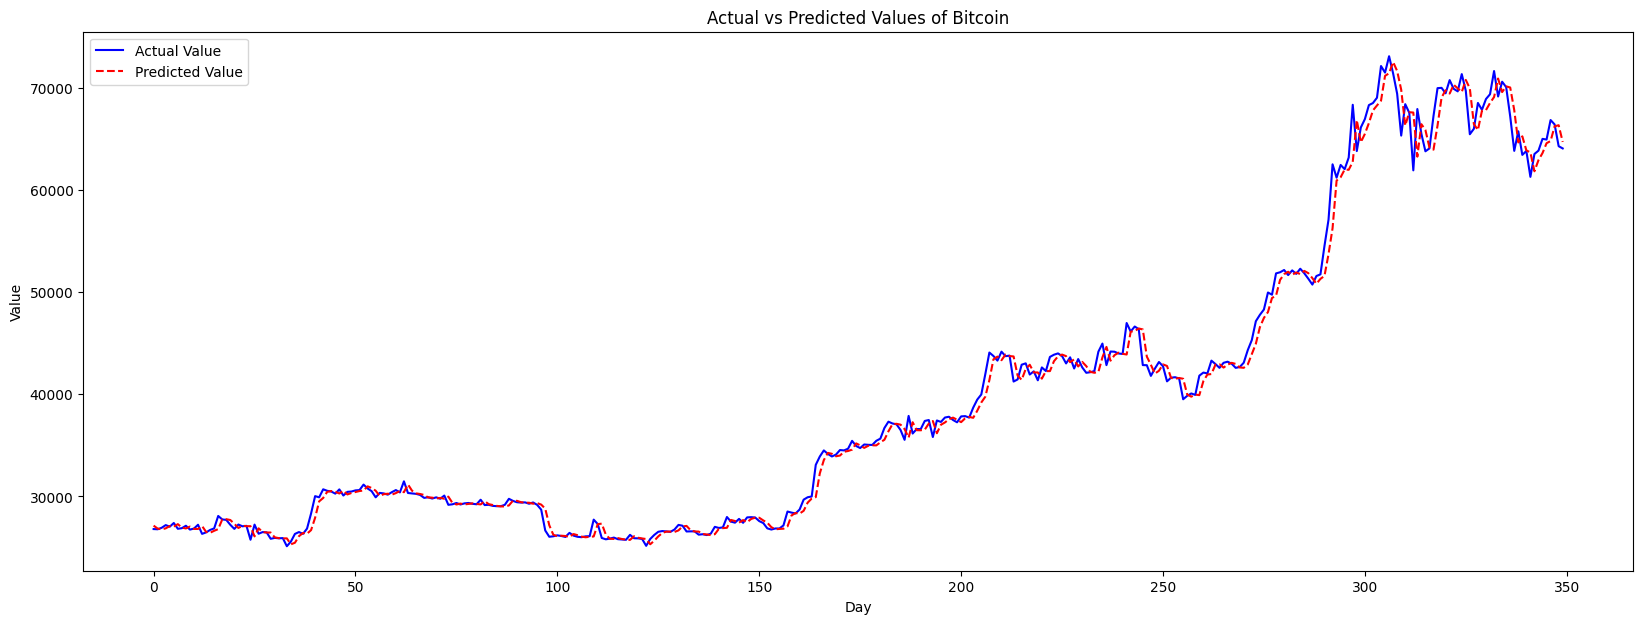

In [13]:
# Plot the predicted vs actual values
plt.figure(figsize=(20, 7))
plt.plot(y_test, label='Actual Value', color='blue')
plt.plot(y_pred, label='Predicted Value', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Values of Bitcoin')
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()




In [207]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1449014.0004634643
R^2 Score: 0.99277336281306


In [48]:
X_test_real=X_test[:1]
print(X_test_real)
y_pred_real=y_pred[:1]
for i in range(1,len(y_test)):
    next_values_prediction = elastic_net_cv.predict(X_test[i-1].reshape(1, -1))
    y_pred_real=np.append(y_pred_real,next_values_prediction)
    next_values_test=X_test[i][1:10]
    next_values_test=np.append(next_values_test,next_values_prediction)
    X_test_real=np.append(X_test_real,next_values_test,axis=0)
    # print(next_values_test)
print(X_test_real[0])
print(len(y_pred_real))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)